In [7]:
# 이미지 사진 띄우기
# !pip install IPython 
from IPython.display import Image

In [1]:
import os,re
import urllib.request as ur # 웹 데이터 다루는 패키지 > 웹 데이터 읽는 모듈
from bs4 import BeautifulSoup as bs # 자료 추출
news = "https://news.daum.net/"
news_ur = ur.urlopen(news).read() # 해당 링크 데이터를 읽음

In [2]:
soup = bs(news_ur, 'html.parser')

# 미션1 : 기사 제목, URL 수집하기

# 1단계 : 기사 제목 및 신문사 수집

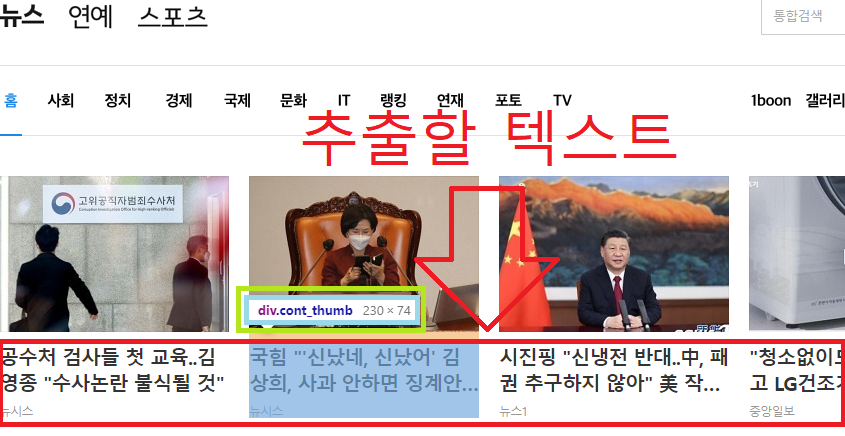

In [10]:
Image("data/daum.png")

In [3]:
# 제목과 신문사 추출
for i in soup.select('div.cont_thumb') : 
    print(i.text)



서울 국공립어린이집 교사 담당 아동 수 줄어든다

한국경제



국힘 "'신났네, 신났어' 김상희, 사과 안하면 징계안 제출"

뉴시스



시진핑 "신냉전 반대..中, 패권 추구하지 않아" 美 작심 비판

뉴스1



"청소없이도 깨끗" 과장광고 LG건조기 3억9000만 과징금

중앙일보



# 2단계 : 기사 제목, 신문사, URL 수집

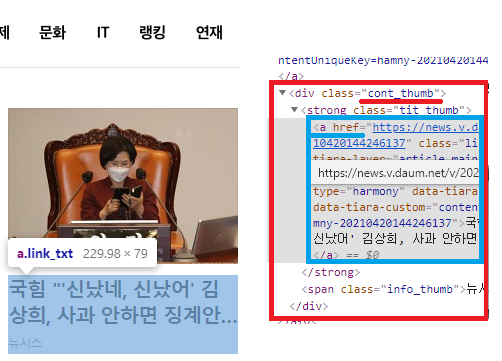

In [15]:
Image("data/news_url.png")

In [12]:
# 기사제목, url 추출하기
# 1차 for 문 : select('div.cont_thumb'): div.cont_thumb 태그에 해당되는 모든 태그의 element 출력
# 2차 for 문 : div.cont_thumb 태그 중 모든 a태그 수집 후 href 속성 출력
for i in soup.select('div.cont_thumb') :
    print(i.text)
    for j in i.find_all('a') :
        print(j.get("href"))



서울 국공립어린이집 교사 담당 아동 수 줄어든다

한국경제

https://news.v.daum.net/v/20210420150502110


국힘 "'신났네, 신났어' 김상희, 사과 안하면 징계안 제출"

뉴시스

https://news.v.daum.net/v/20210420144246137


시진핑 "신냉전 반대..中, 패권 추구하지 않아" 美 작심 비판

뉴스1

https://news.v.daum.net/v/20210420141314843


"청소없이도 깨끗" 과장광고 LG건조기 3억9000만 과징금

중앙일보

https://news.v.daum.net/v/20210420120116466


## a태그 전체 추출하기

In [18]:
for i in soup.select('div.cont_thumb') : 
    print(i.find_all('a'))

[<a class="link_txt" data-tiara-custom="contentUniqueKey=hamny-20210420150502110" data-tiara-id="20210420150502110" data-tiara-layer="article_main" data-tiara-ordnum="1" data-tiara-type="harmony" href="https://news.v.daum.net/v/20210420150502110">서울 국공립어린이집 교사 담당 아동 수 줄어든다</a>]
[<a class="link_txt" data-tiara-custom="contentUniqueKey=hamny-20210420144246137" data-tiara-id="20210420144246137" data-tiara-layer="article_main" data-tiara-ordnum="1" data-tiara-type="harmony" href="https://news.v.daum.net/v/20210420144246137">국힘 "'신났네, 신났어' 김상희, 사과 안하면 징계안 제출"</a>]
[<a class="link_txt" data-tiara-custom="contentUniqueKey=hamny-20210420141314843" data-tiara-id="20210420141314843" data-tiara-layer="article_main" data-tiara-ordnum="1" data-tiara-type="harmony" href="https://news.v.daum.net/v/20210420141314843">시진핑 "신냉전 반대..中, 패권 추구하지 않아" 美 작심 비판</a>]
[<a class="link_txt" data-tiara-custom="contentUniqueKey=hamny-20210420120116466" data-tiara-id="20210420120116466" data-tiara-layer="article_main

## a태그 중 텍스트만 추출하기

In [17]:
for i in soup.select('div.cont_thumb') : 
    for j in i.find_all('a') :
        print(j.text)

서울 국공립어린이집 교사 담당 아동 수 줄어든다
국힘 "'신났네, 신났어' 김상희, 사과 안하면 징계안 제출"
시진핑 "신냉전 반대..中, 패권 추구하지 않아" 美 작심 비판
"청소없이도 깨끗" 과장광고 LG건조기 3억9000만 과징금


### 기사내용 추출

In [11]:
article1 = "https://news.v.daum.net/v/20210117223102994"

In [12]:
soup2 = bs(ur.urlopen(article1).read(),'html.parser')

In [7]:
# 기사의 내용은 주로 p태그에 존재
for i in soup2.find_all('p') : 
    print(i.text)

NameError: name 'soup2' is not defined

## 기사제목, 기사내용 추출

In [8]:
headline = soup.select('div.cont_thumb')

In [9]:
headline[0].text

'\n\n진통부터 국토위 통과까지..가덕도특별법 두고 숨가빴던 與\n\n뉴스1\n'

In [10]:
for i in headline : 
    print(i.text, '\n')
    soup3 = bs(ur.urlopen(i.find_all('a')[0].get('href')).read(),'html.parser')
    for j in soup3.find_all('p') :
        print(j.text)



진통부터 국토위 통과까지..가덕도특별법 두고 숨가빴던 與

뉴스1
 

부산 가덕도 신공항 건설을 위한 '가덕도 신공항 특별법'이 19일 국회 국토교통위원회를 우여곡절 끝에 통과함에 따라 더불어민주당이 한숨을 돌리게 됐다.
국토위는 이날 오후 전체회의를 열고 Δ필요시 예비타당성(예타) 조사 면제 Δ사전타당성 조사 간소화 등의 내용을 담은 가덕도신공항특별법을 의결했다.
Translated by kakao i

(서울=뉴스1) 이철 기자,정재민 기자,이준성 기자 = 부산 가덕도 신공항 건설을 위한 '가덕도 신공항 특별법'이 19일 국회 국토교통위원회를 우여곡절 끝에 통과함에 따라 더불어민주당이 한숨을 돌리게 됐다.
국토위는 이날 오후 전체회의를 열고 Δ필요시 예비타당성(예타) 조사 면제 Δ사전타당성 조사 간소화 등의 내용을 담은 가덕도신공항특별법을 의결했다.
여야는 앞서 열린 국토위 법안심사소위(법안소위)에서 가덕도신공항특별법의 쟁점이던 예타 조사에 대해 '기재부 장관이 필요할 경우, 신속하고 원활한 건설을 위해 국가재정법 제38조 1항에도 불구하고 면제할 수 있다'는 조항을 넣기로 합의했다.
이날 국토위 전체회의를 통과한 가덕도신공항특별법은 오는 25일 법제사법위원회 심사를 거쳐 26일 본회의에 상정될 전망이다.
원안 내용이 상당 부분 담겼지만 과정은 쉽지 않았다. 김해 신공항 폐지 여부를 두고 이날 오후 늦게까지 고성이 오갔다.
문진석 더불어민주당 의원은 법안소위 중간 기자들과 만나 "부칙에 그런 조항(김해신공항 폐지)이 들어가지 않으면 사업 수행이 원만하지 않아 부칙에 넣자는 것이 여당 입장이지만, 야당의 반발이 심하다"고 전하기도 했다.
하지만 여야 합의로 김해신공항 폐지는 조문에 명시하지 않고 부칙에 넣기로 했다.
부칙은 '국토부 장관이 가덕도 신공항의 위계 및 기능과 중복되는 내용이 없도록 제6차 공항 종합계획을 수립한다'는 것이다.

민주당은 지난 17일 법안소위에서 사전타당성 검토 축소, 예비타당성 조사 면제 등이 쟁점으로 부상한 직후 줄곧 분주

# 미션2 : 제목, 신문사, URL을 수집 후 엑셀로 만들어보자

In [19]:
import requests 
from bs4 import BeautifulSoup 
import openpyxl

In [20]:
excel_file = openpyxl.Workbook() 
excel_sheet = excel_file.active
excel_sheet.append(["제목", "신문사", "링크"])

In [21]:
res = requests.get("https://news.daum.net/") 
soup = BeautifulSoup(res.text, 'html.parser')

### 수집 대상

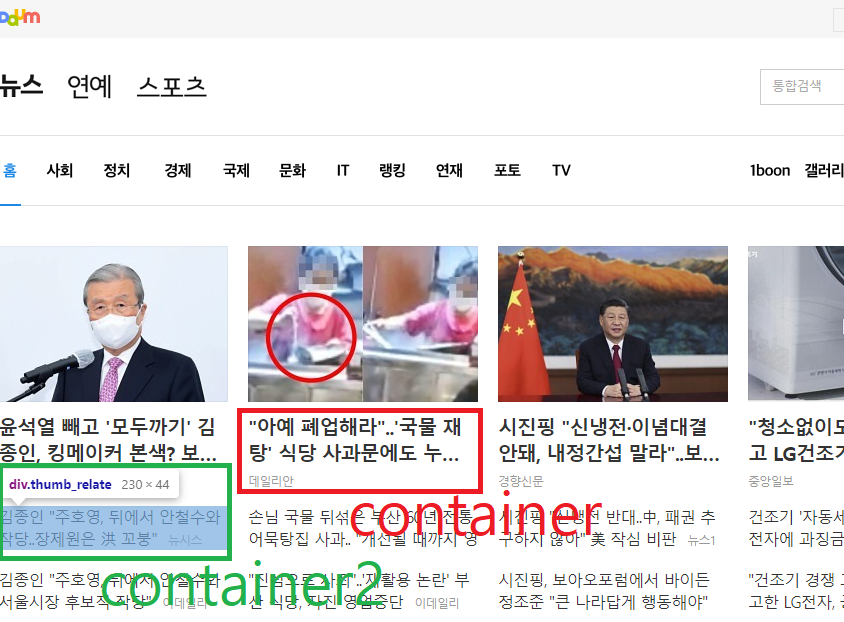

In [22]:
Image("data/news_url2.png")

In [36]:
container = soup.select("div.cont_thumb")
container2 = soup.select("div.thumb_relate")

In [38]:
# 최상단 기사
for con in container:
    t = con.select_one("strong.tit_thumb").text.strip() # 제목 
    c = con.select_one("span.info_thumb").text.strip() # 신문사
    # l = con.select_one("a.href")
    for j in i.find_all('a') :
        l = j.get("href")
    
    # sheet 내 각 행에 데이터 추가 
    excel_sheet.append([t, c, l])

# 차상위 기사
for con in container2 :
    t = con.select_one("a").text.strip() #제목 
    c = con.select_one("span.info_thumb").text.strip() # 신문사
    for j in i.find_all('a') :
        l = j.get("href")
        
    # sheet 내 각 행에 데이터 추가 
    excel_sheet.append([t, c, l])
    
excel_file.save('daum_news.xlsx')

TypeError: 'NoneType' object is not callable